In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
sln = np.array(
[
    [1109, 68, 0, 0],
    [373, 728, 76, 0],
    [4, 257, 852, 65],
    [0, 3, 346, 829],
    [0, 0, 15, 1163]
])

coat = np.array(
[
    [198, 9, 0, 0],
    [78, 85, 3, 0],
    [3, 43, 68, 4],
    [0, 1, 68, 30],
    [0, 0, 4, 83]
])

pH = np.arange(2, 9.5, 1.5)
surf_area = 78.54
cit_charges = np.array([0, -1, -2, -3])

zeta_pot = np.array([-23.6, -35.9, -39.7, -38.5, -42.1])
zeta_err = np.array([7.24, 3.81, 2.39, 1.49, 1.68])

In [3]:
tot_sln = np.sum(sln, axis=-1)
tot_coat = np.sum(coat, axis=-1)

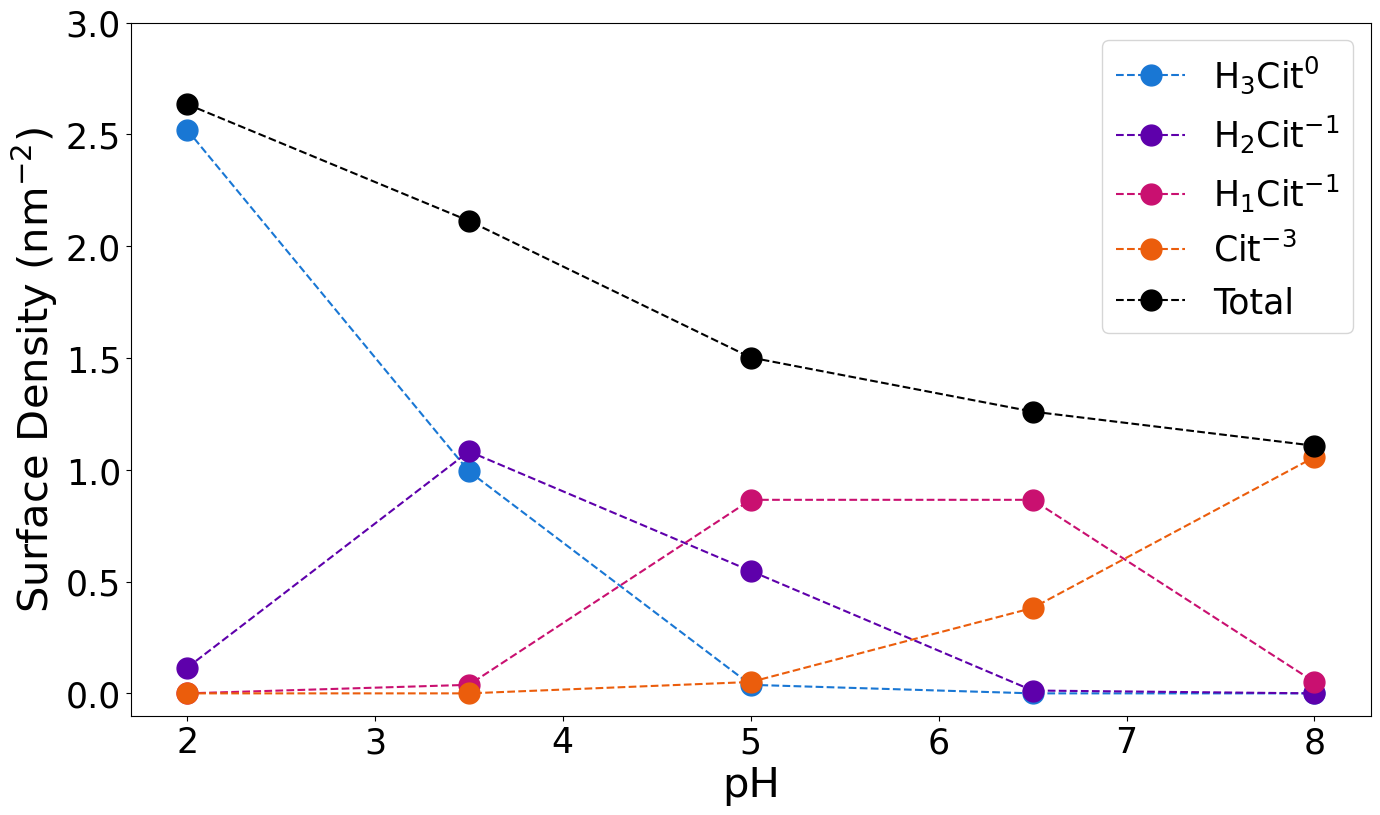

In [4]:
cit_names = [r'H$_3$Cit$^{0}$', r'H$_2$Cit$^{-1}$', r'H$_1$Cit$^{-1}$', r'Cit$^{-3}$']
colors = ['#1977d4', '#5e00ab','#c91070', '#eb5d0c']

plt.figure(figsize=(16, 9))

for i in np.arange(4):
    plt.plot(pH, coat[:, i]/surf_area, ls='--', color=colors[i],
             marker='o', ms=15, label=cit_names[i])

plt.plot(pH, tot_coat/surf_area,  ls='--', color='black', 
         marker='o', ms=15, label='Total')
plt.ylim(-0.1, 3)
plt.yticks(fontsize=25)
plt.ylabel(r'Surface Density (nm$^{-2}$)', fontsize=30)
plt.xticks(fontsize=25)
plt.xlabel(r'pH', fontsize=30)
plt.legend(fontsize=25)
plt.savefig('surf_dens_v_ph.pdf')

/var/folders/4t/fzjtnyzn477dfj6zr3b15_nm0000gn/T/ipykernel_35372/3226451005.py:7: RuntimeWarning: invalid value encountered in divide
  plt.plot(pH, coat[:, i]/sln[:, i], ls='--', color=colors[i],


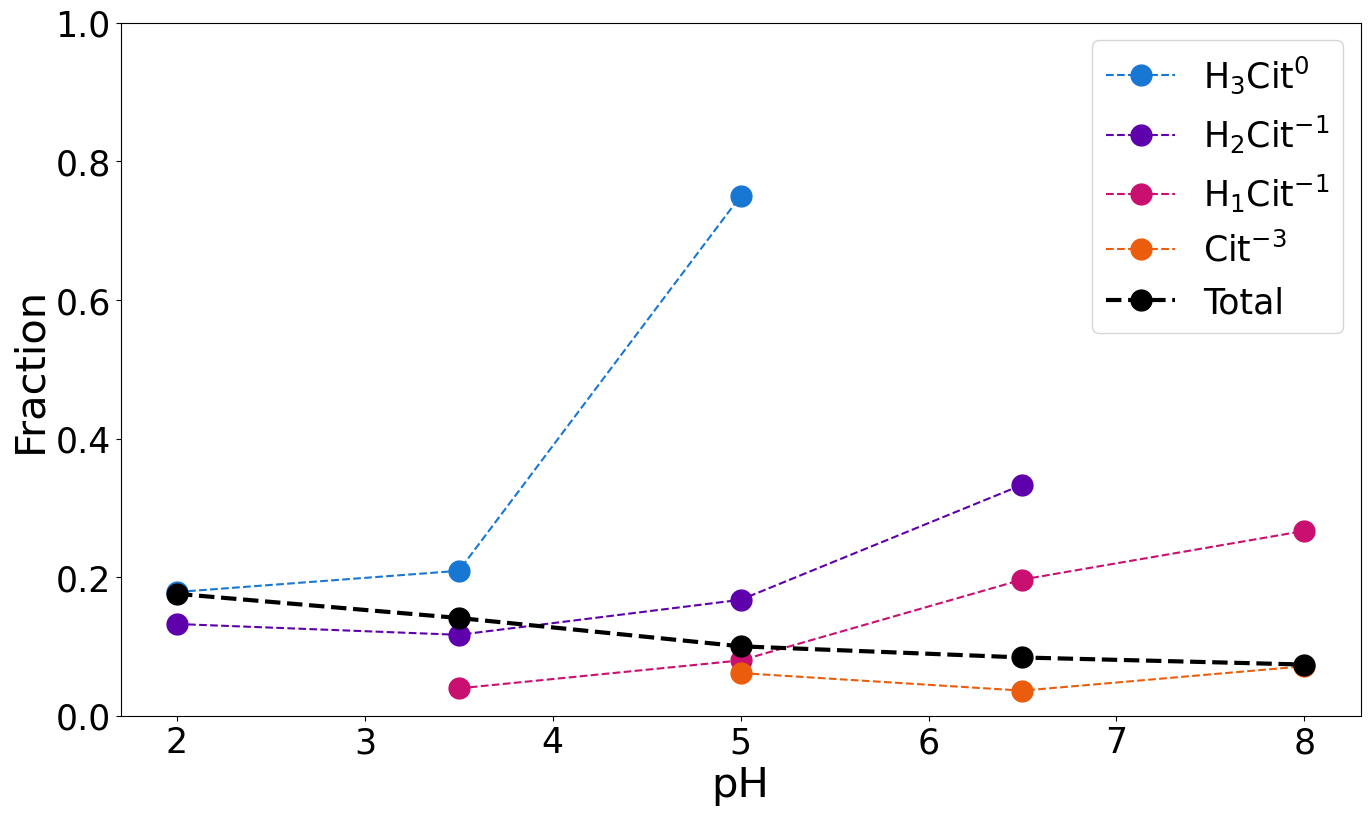

In [5]:
cit_names = [r'H$_3$Cit$^{0}$', r'H$_2$Cit$^{-1}$', r'H$_1$Cit$^{-1}$', r'Cit$^{-3}$']
colors = ['#1977d4', '#5e00ab','#c91070', '#eb5d0c']

plt.figure(figsize=(16, 9))

for i in np.arange(4):
    plt.plot(pH, coat[:, i]/sln[:, i], ls='--', color=colors[i],
             marker='o', ms=15, label=cit_names[i])

plt.plot(pH, tot_coat/tot_sln,  ls='--', lw=3, color='black', 
         marker='o', ms=15, label='Total')
plt.ylim(0, 1)
plt.yticks(fontsize=25)
plt.ylabel(r'Fraction', fontsize=30)
plt.xticks(fontsize=25)
plt.xlabel(r'pH', fontsize=30)
plt.legend(fontsize=25)
plt.savefig('frac_v_ph.pdf')

/var/folders/4t/fzjtnyzn477dfj6zr3b15_nm0000gn/T/ipykernel_35372/1644282094.py:7: RuntimeWarning: invalid value encountered in divide
  plt.plot(pH, (coat[:, i]/sln[:, i])/(tot_coat/tot_sln), ls='--', color=colors[i],


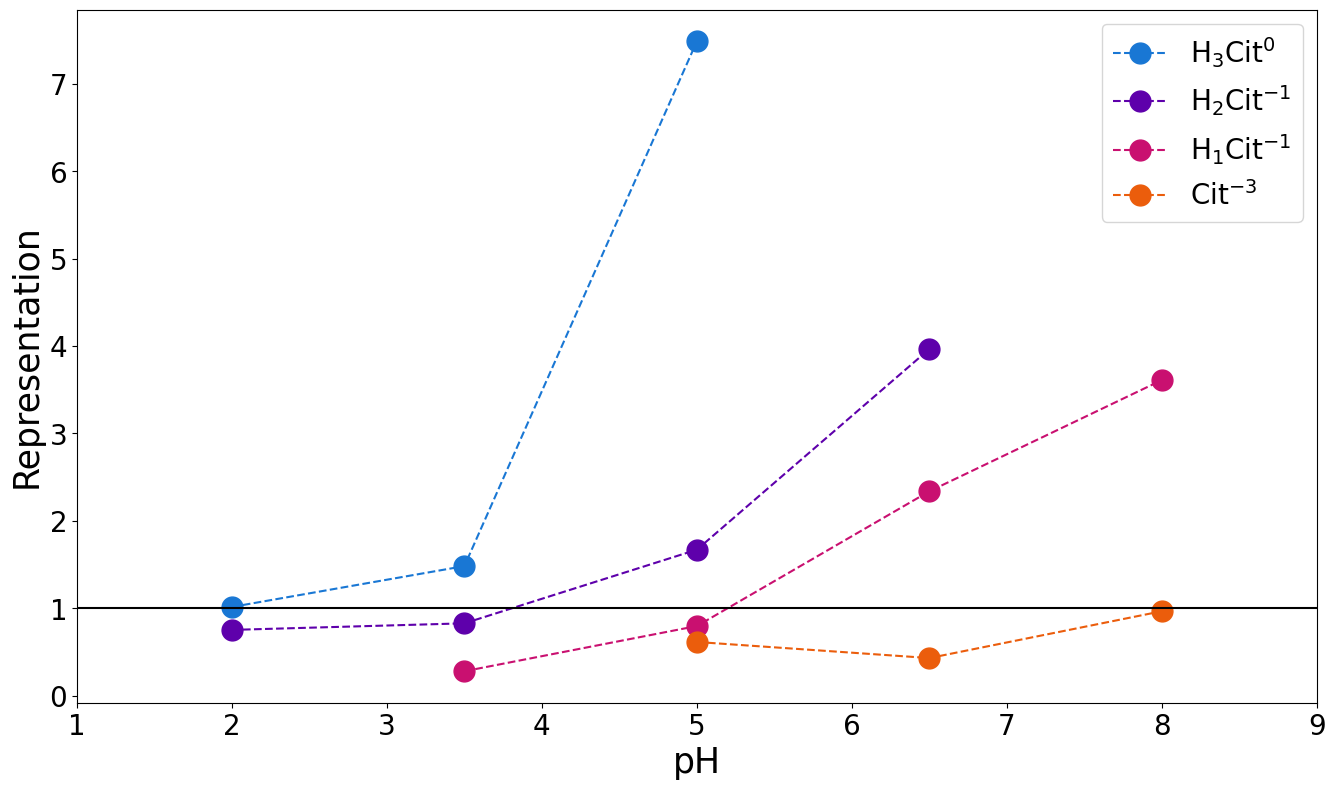

In [6]:
cit_names = [r'H$_3$Cit$^{0}$', r'H$_2$Cit$^{-1}$', r'H$_1$Cit$^{-1}$', r'Cit$^{-3}$']
colors = ['#1977d4', '#5e00ab','#c91070', '#eb5d0c']

plt.figure(figsize=(16, 9))

for i in np.arange(4):
    plt.plot(pH, (coat[:, i]/sln[:, i])/(tot_coat/tot_sln), ls='--', color=colors[i],
             marker='o', ms=15, label=cit_names[i])

#plt.plot(pH, (tot_coat/tot_sln)/(tot_coat/tot_sln),  ls='--', lw=3, color='black', 
#         marker='o', ms=15, label='Total')
plt.xlim(1, 9)
plt.hlines(1, 1, 9, 'k')
plt.yticks(fontsize=20)
plt.ylabel(r'Representation', fontsize=25)
plt.xticks(fontsize=20)
plt.xlabel(r'pH', fontsize=25)
plt.legend(fontsize=20)
#plt.savefig('rep_v_ph.pdf')

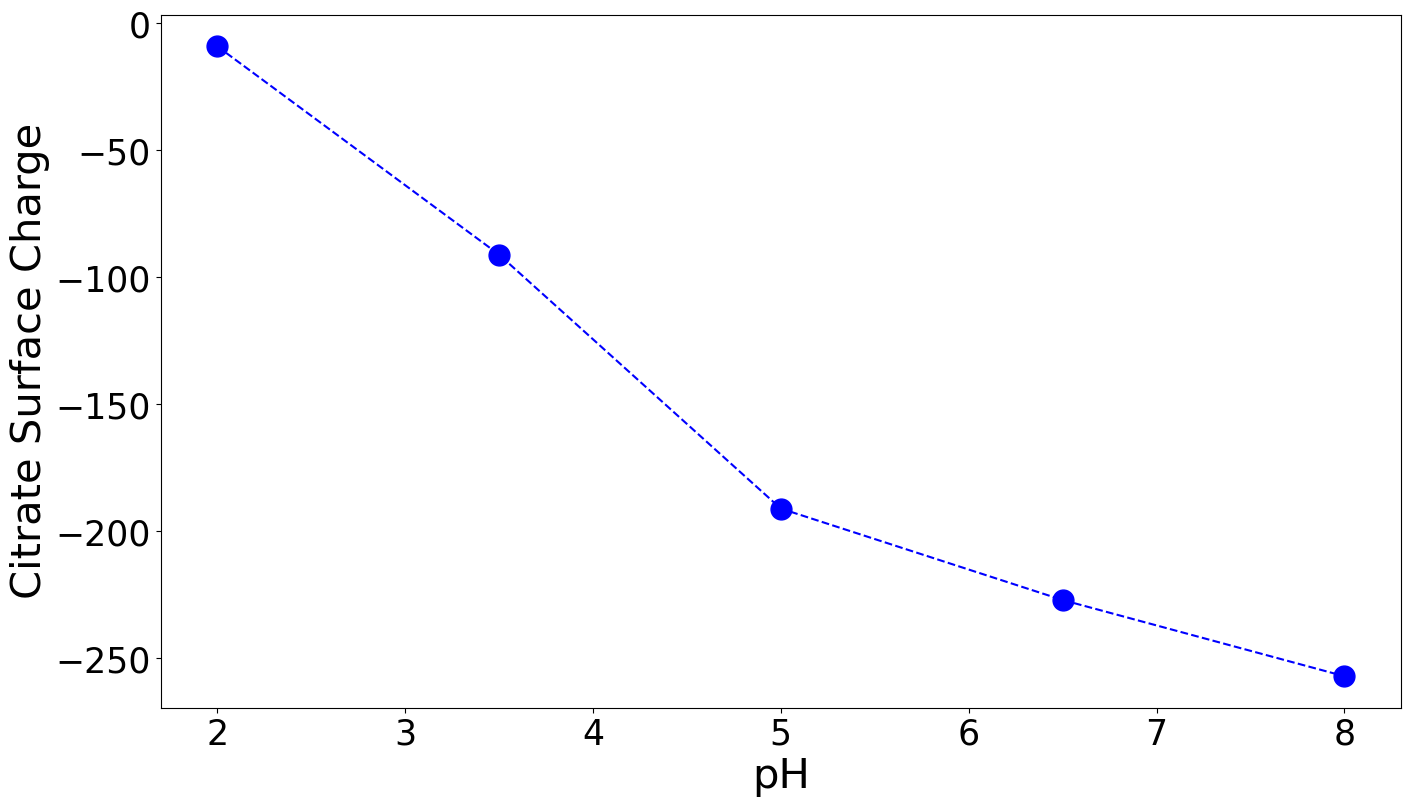

In [7]:

plt.figure(figsize=(16, 9))

plt.plot(pH, np.sum(coat*cit_charges, axis=-1), ls='--', color='b',
             marker='o', ms=15)

#plt.plot(pH, (tot_coat/tot_sln)/(tot_coat/tot_sln),  ls='--', lw=3, color='black', 
#         marker='o', ms=15, label='Total')
#plt.xlim(1, 9)
plt.yticks(fontsize=25)
plt.ylabel(r'Citrate Surface Charge', fontsize=30)
plt.xticks(fontsize=25)
plt.xlabel(r'pH', fontsize=30)
#plt.legend(fontsize=20)
plt.savefig('surf_charge_c_v_ph.pdf')

In [8]:
reg = sp.stats.linregress(np.sum(coat*cit_charges, axis=-1), zeta_pot)
reg

LinregressResult(slope=0.06506998297711367, intercept=-25.874152638547375, rvalue=0.9214668093755021, pvalue=0.02610540898816944, stderr=0.015837383511590194, intercept_stderr=2.854430816661712)

In [9]:
reg[2]**2

0.8491010807806679

In [10]:
def lin(x,intercept,slope):
    """This function defines the function to be fit. In this case a linear
    function.
    
    Parameters
    ----------
    x : independent variable
    slope : slope
    intercept : intercept
    
    Returns
    -------
    y : dependent variable
    """
    y = intercept + slope * x
    return y

In [19]:
fit_no_err, cov_no_err = sp.optimize.curve_fit(lin, np.sum(coat*cit_charges, axis=-1), zeta_pot)
fit, cov = sp.optimize.curve_fit(lin, np.sum(coat*cit_charges, axis=-1), zeta_pot, 
                                 sigma=zeta_err, 
                                 absolute_sigma=False)

In [20]:
fit_no_err

array([-25.87415253,   0.06506998])

In [21]:
np.sqrt(np.diag(cov_no_err))

array([2.85443088, 0.01583738])

In [22]:
fit

array([-29.07661243,   0.04753451])

In [23]:
np.sqrt(np.diag(cov))

array([4.04085875, 0.01804055])

In [24]:
#change in uncertainty when error is added:
np.sqrt(np.diag(cov_no_err))/np.sqrt(np.diag(cov))

array([0.70639214, 0.87787687])

In [25]:
np.sqrt(np.diag(cov))*100/np.abs(fit)

array([13.89728173, 37.95253638])

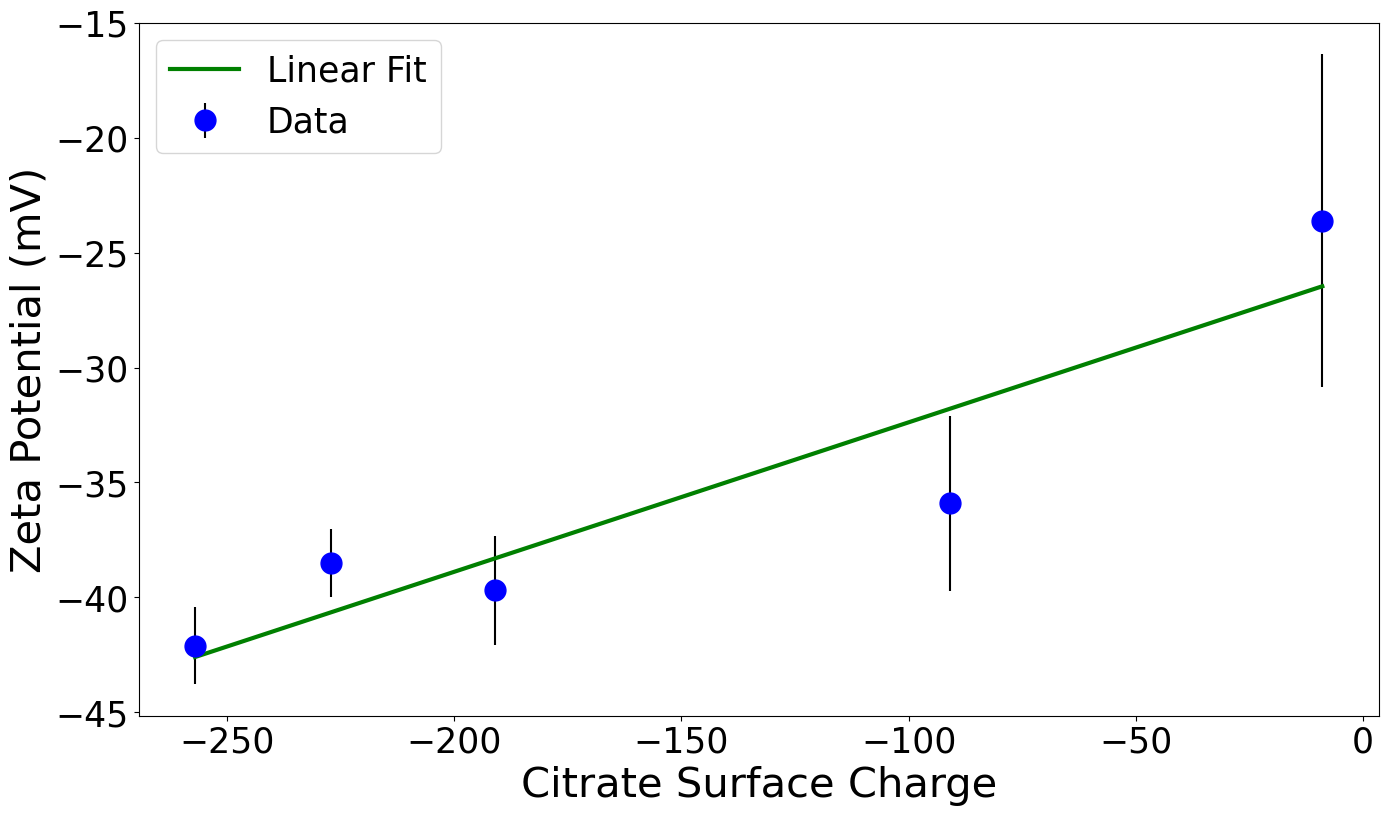

In [18]:

plt.figure(figsize=(16, 9))

x = np.sum(coat*cit_charges, axis=-1)

plt.errorbar(x, zeta_pot, 
             yerr=zeta_err, ecolor='k',
             ls='', color='b',
             marker='o', ms=15, label='Data')
plt.plot(x, lin(x, *fit_no_err), 'g-', lw=3, label='Linear Fit')
#plt.plot(pH, (tot_coat/tot_sln)/(tot_coat/tot_sln),  ls='--', lw=3, color='black', 
#         marker='o', ms=15, label='Total')
#plt.xlim(1, 9)
plt.yticks(fontsize=25)
plt.ylabel(r'Zeta Potential (mV)', fontsize=30)
plt.xticks(fontsize=25)
plt.xlabel(r'Citrate Surface Charge', fontsize=30)
plt.legend(fontsize=25, loc='upper left')
plt.savefig('zeta_v_surf_charge_c.pdf')